# Tests for Regression Models

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from regression_models import linear_regression
from regression_models import polynomial_regression

### Data preparation

In [4]:
n = int(input())

100


In [5]:
X0 = np.linspace(0, 2*np.pi, n)
X1 = np.linspace(0, 2*np.pi, n)

In [6]:
X0, X1 = np.meshgrid(X0, X1)

In [7]:
def func(X0, X1):
    # return 9 + 24*X0 + 12*X1 + 16*X0**2 + 16*X0*X1 + 4*X1**2
    
    # alpha = 0.7
    # phi_ext = 2 * np.pi * 0.5
    # return 2 + alpha - 2 * np.cos(X0) * np.cos(X1) - alpha * np.cos(phi_ext - 2 * X0)
    
    return np.sin(X0) + np.cos(X1)

In [8]:
Y = func(X0, X1)

In [9]:
X_flat = np.array(list(zip(X0.ravel(), X1.ravel())))
Y_flat = Y.ravel()

### Regression

**Linear Regression**

In [10]:
lin_reg, lin_coefs, lin_r_squared = linear_regression(X_flat, Y_flat, verbose=True)

Linear Regression (start):
  0.936348889097*1 + -0.294866009455*x0 + -1.3983619708e-16*x1 

  R-squared: 0.2918
Linear Regression (end)



In [11]:
Y_linear = lin_coefs[0] + lin_coefs[1]*X0 + lin_coefs[2]*X1

**Polynomial Regression**

In [12]:
def poly_regress(degree, verbose=False):
    pol_reg, pol_coefs, pol_r_squared = polynomial_regression(X_flat, Y_flat, degree, verbose)
    
    powers = pol_reg.named_steps['poly'].powers_
    Y_poly = np.zeros((n, n))
    for i in range(len(powers)):
        Y_poly += pol_coefs[i] * (X0**powers[i][0]) * (X1**powers[i][1])
    
    return Y_poly

In [13]:
degree = int(input())

10


In [14]:
Y_poly = poly_regress(degree, verbose=True)

Polynomial Regression (start):
  Degree: 10 

  1.00001091281*1 + 0.999706341683*x0 + -4.6540579403e-05*x1 + 0.0016594933281*x0^2 + 8.796953396e-09*x0*x1 + -0.499682534615*x1^2 + -0.170479594818*x0^3 + -1.40029750962e-09*x0^2*x1 + -3.25262969022e-09*x0*x1^2 + -0.000877721825068*x1^3 + 0.00457216026121*x0^4 + -5.60942217155e-11*x0^3*x1 + 2.81666956688e-09*x0^2*x1^2 + 2.62280729741e-09*x0*x1^3 + 0.0429420671095*x1^4 + 0.00512241068715*x0^5 + -4.39464584081e-10*x0^4*x1 + -5.55002386388e-10*x0^3*x1^2 + -8.94276872281e-10*x0^2*x1^3 + -1.14748642836e-09*x0*x1^4 + -0.00110098929776*x1^5 + 0.00139357244309*x0^6 + -2.13360841581e-11*x0^5*x1 + 9.13537389182e-11*x0^4*x1^2 + 3.75134404876e-11*x0^3*x1^3 + 1.82692563118e-10*x0^2*x1^4 + 4.27716982925e-11*x0*x1^5 + -0.000787330764532*x1^6 + -0.000576111120923*x0^7 + 6.35881709701e-11*x0^6*x1 + 1.46014728086e-11*x0^5*x1^2 + 4.04594951292e-11*x0^4*x1^3 + 3.32033098932e-11*x0^3*x1^4 + 1.0393340702e-11*x0^2*x1^5 + 6.4047018882e-11*x0*x1^6 + -0.00021380405

### Graphs

In [67]:
def plot(ax, X, Y, Z, wireframe=False, alpha=0.5, show_contours=True, tight=False, title=None):
    if wireframe:
        p = ax.plot_wireframe(X, Y, Z, rstride=n//10, cstride=n//10)
    else:
        p = ax.plot_surface(X, Y, Z, rstride=n//10, cstride=n//10, alpha=alpha)

    if show_contours:
        cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
        cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)
        cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)

    if not tight:
        ax.set_xlim3d(-np.pi, 2*np.pi);
        ax.set_ylim3d(0, 3*np.pi);
        ax.set_zlim3d(-np.pi, 2*np.pi);

    if title is not None:
        t = plt.title(title)
    
    return p

In [68]:
fig = plt.figure(figsize=(18, 12))

In [69]:
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
p = plot(ax1, X0, X1, Y, title="Original Data")

In [70]:
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
p = plot(ax2, X0, X1, Y_linear, title="Linear Estimate")

In [71]:
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
p = plot(ax3, X0, X1, poly_regress(2), title="Polynomial Estimate (degree %d)" % 2)

In [72]:
ax4 = fig.add_subplot(2, 3, 4, projection='3d')
p = plot(ax4, X0, X1, poly_regress(4), title="Polynomial Estimate (degree %d)" % 4)

In [73]:
ax5 = fig.add_subplot(2, 3, 5, projection='3d')
p = plot(ax5, X0, X1, poly_regress(6), title="Polynomial Estimate (degree %d)" % 6)

In [74]:
ax6 = fig.add_subplot(2, 3, 6, projection='3d')
p = plot(ax6, X0, X1, poly_regress(8), title="Polynomial Estimate (degree %d)" % 8)

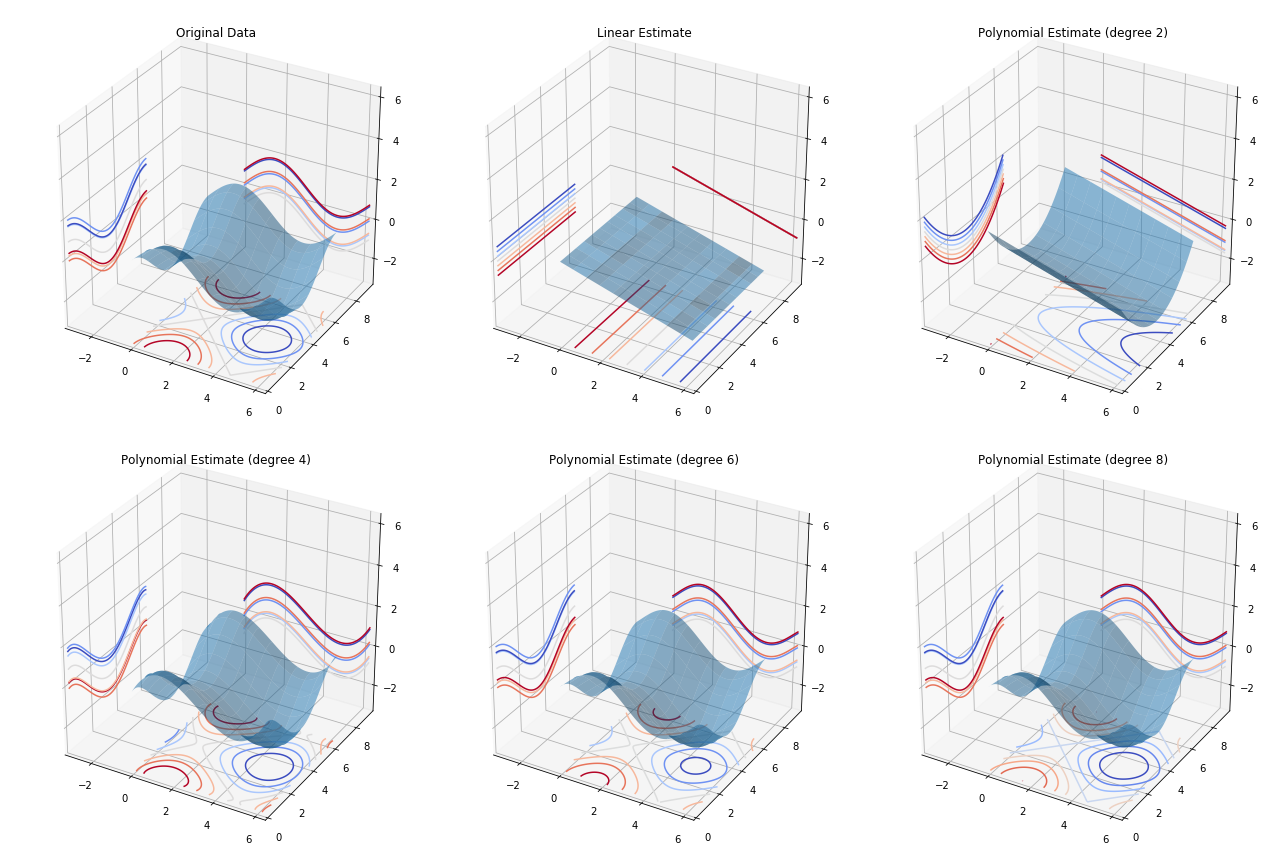

In [75]:
fig.tight_layout()
plt.show()
plt.close()

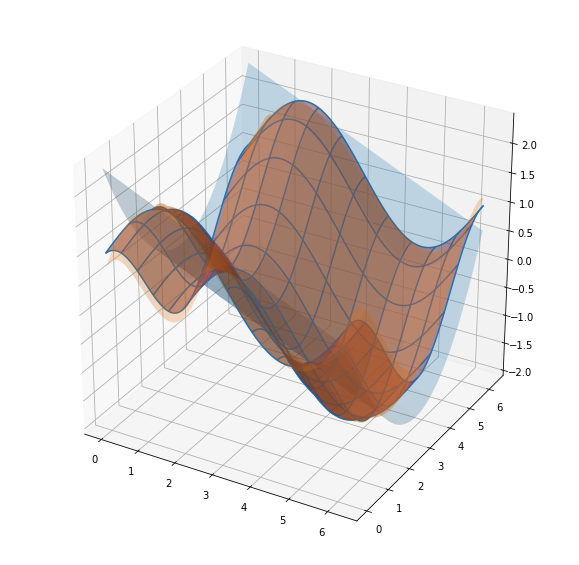

In [76]:
# TODO animate this
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for degree in range(2, 12, 2):
    plot(ax, X0, X1, poly_regress(degree), alpha=0.25, show_contours=False, tight=True)
plot(ax, X0, X1, Y, wireframe=True, show_contours=False, tight=True)
plt.show()
plt.close()